# <center>基于机器学习的城区个人养老模式预测与分析</center>

<center>作者1, 作者2</center>

1. 工作单位
2. 工作单位

## 摘要

### 目的

通过对局部人群调查量表的计算分析，明确机器学习对于城市人群养老倾向性的指导意义。

### 方法

通过Tencent调查平台建立调查量表，在XXX区域发放并指导相关个人进行填写; 资料汇总后进行规范化录入保存至Excel文件，导入至Jupyter Notebook平台基于Scikit Learn机器学习工具包进行分析。

### 结果

调查采集XXXX年XXXX月-xxxx年xxxx月XXX城区个体共322人，每份29个问答资料，平均年龄XXX岁，其中XXX人（xx%）选择居家养老，机器学习决策树（ENGLISH）模型调参后基于全部资料预测准确度0.90，交叉验证评分0.83;基于基本情况feature的预测准确度为0.90, 交叉验证评分0.85。对养老模式选择的影响因素前五项分别为XXX，XXX，XXX，XXX，XXX。养老的心理期待值体现为对XXX（xx%），XXX（xx%），XXX（xx%）具有强烈的意愿，与XXX相关，模型对其心理预测推断值为xxx%。

### 讨论

城市人群的养老意愿可以对调查量表进行机器学习的方法进行预测，个人的基本情况很大程度决定了其养老倾向，这种方式有助于对局部人群养老的政策进行更科学的规划。

## 关键词

Machine Learning,  Aged Care, 

## 引言

1. 什么是养老，为什么要研究养老;
2. 目前国外养老的模式是什么，有哪些优缺点;
3. 目前国内的养老模式是什么，有哪些优缺点;
4. 针对这些缺点目前有哪些方法，具体怎么操作的;
5. 为什么选择机器学习的方法，有哪些具体事项;
6. 选择机器学习研究本项目的目的是什么？

## 材料与方法

1. 调查问卷设计的过程是这样的
2. 调查的人群方式
3. 填表的相关说明
4. 数据处理的方式

## 结果

In [465]:
import numpy as np
import scipy.stats as scs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

pd.set_option('precision', 2)
pd.options.display.max_columns = None # Show all columns
pd.options.display.max_rows = None # Show all columns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

###  1. 数据统一录入至Excel表格

In [466]:
data = pd.read_excel('./aged.xls')
data.head()

,group,age,sex,education,profession,income,companion,selfcare,children
0,0,1,1,3,1,1,3,1,2
1,0,1,1,3,5,2,5,1,2
2,0,1,1,5,1,1,3,1,2
3,1,1,1,5,4,1,3,1,2
4,1,1,1,5,5,2,3,1,1


### 2. 单项分析 （只做临时分析之用）

#### 2.1 分组 （居家=0, 家外=1）

按照本文立意进行分组，分组原则：本研究旨在通过分析目标人群的客观条件和心理因素，预测分析其选择居家养老和家外养老的可能性，中国人习惯家里养老，占大多数，选择养老院等外地养老占少数，属于不平衡数据，探索某一人群政府是否应该建设更多的养老机构。居家427例，家外160例。

In [467]:
data.groupby('group').size()

group
0    427
1    160
dtype: int64

#### 2.2 年龄（1. <55; 2. 55-60; 3. 61-70; 4. 71-80; 5. >81）

结果：表明60岁以上表现出明显的居家养老倾向，60岁以下由于没有进入到真正养老阶段，家外养老比例明显较高，是否纳入政府决策？

In [468]:
data[['age', 'group']].groupby(['age','group']).size()

age  group
1    0        104
     1         92
2    0         26
     1         12
3    0        188
     1         27
4    0        104
     1         22
5    0          5
     1          7
dtype: int64

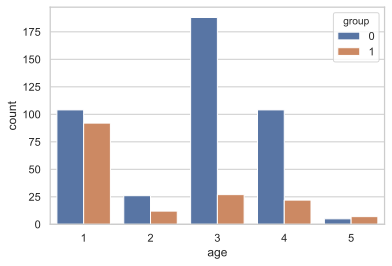

In [469]:
sns.countplot(x="age", hue="group", data=data)

#### 2.3 性别 (男 0; 女 1)

结果：女性选择家外养老比例较男性略高

In [470]:
data[['sex', 'group']].groupby(['sex','group']).size()

sex  group
0    0        166
     1         46
1    0        261
     1        114
dtype: int64

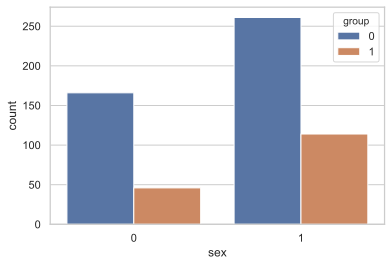

In [471]:
sns.countplot(x="sex", hue="group", data=data)

#### 2.4 文化程度 ( 1. 小学; 2. 初中; 3. 高中; 4. 专科; 5. 本科及以上)

结果：差别不明显，以居家为主，两者比率类似

In [472]:
data[['education', 'group']].groupby(['education','group']).size()

education  group
1          0        173
           1         36
2          0         70
           1         28
3          0         49
           1         17
4          0         32
           1         24
5          0        103
           1         55
dtype: int64

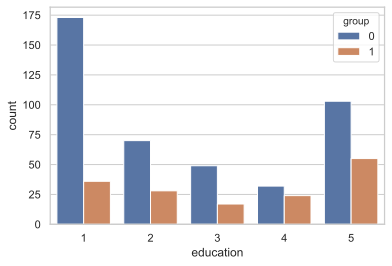

In [473]:
sns.countplot(x="education", hue="group", data=data)

#### 2.5 职业 (1. 企业单位；2. 事业单位； 3. 机关政府单位；4. 个体；5. 无正式工作)

结果：个体及无工作者有家外养老趋势

In [474]:
data[['profession', 'group']].groupby(['profession','group']).size()

profession  group
1           0        201
            1         54
2           0        148
            1         64
3           0         38
            1          4
4           0         24
            1         16
5           0         16
            1         22
dtype: int64

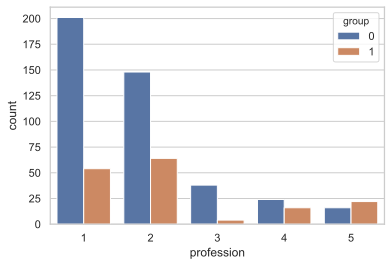

In [475]:
sns.countplot(x="profession", hue="group", data=data)

#### 2.6 收入 (1. 1万及以上; 2. 8000 ~ 1万; 3. 5000 ~ 7999; 4. 2000 ~ 4999; 5. 2000元及以下)

结果：低收入者有家外养老趋势，文化程度、职业、收入，三者关系待研究

In [476]:
data[['income', 'group']].groupby(['income','group']).size()

income  group
1       0         35
        1         20
2       0         42
        1         22
3       0        127
        1         35
4       0        110
        1         41
5       0        113
        1         42
dtype: int64

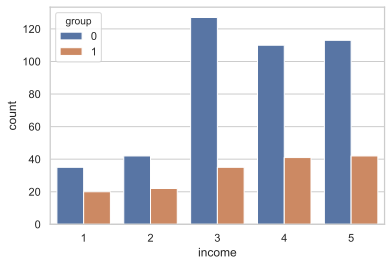

In [477]:
sns.countplot(x="income", hue="group", data=data)

#### 2.7 伴侣（1. 老伴； 2. 子女； 3. 老伴子女； 4. 独居； 5. 其他）

结果：独居者对居家无明显偏好。

In [478]:
data[['companion', 'group']].groupby(['companion','group']).size()

companion  group
1          0        261
           1         57
2          0         31
           1         27
3          0         60
           1         36
4          0         67
           1         24
5          0          8
           1         16
dtype: int64

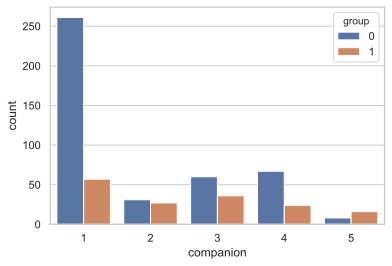

In [479]:
sns.countplot(x="companion", hue="group", data=data)

#### 2.8 自理能力（1. 完全自理；2. 基本自理; 3. 半自理; 4. 不能自理）

结果：各项比例类似，完全自理者倾向居家养老。

In [480]:
data[['selfcare', 'group']].groupby(['selfcare','group']).size()

selfcare  group
1         0        232
          1        132
2         0        135
          1         20
3         0         48
          1          5
4         0         12
          1          3
dtype: int64

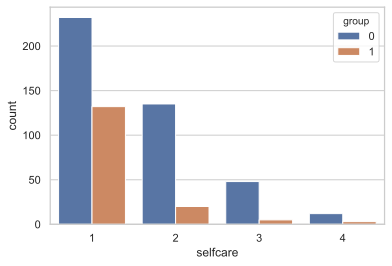

In [481]:
sns.countplot(x="selfcare", hue="group", data=data)

#### 2.9 子女数量 （0. 0; 1. 1; 2. 2; 3. >=3）

结果：结果比率类似

In [482]:
data[['children', 'group']].groupby(['children','group']).size()

children  group
0         0         20
          1         14
1         0        148
          1         40
2         0        225
          1         70
3         0         34
          1         36
dtype: int64

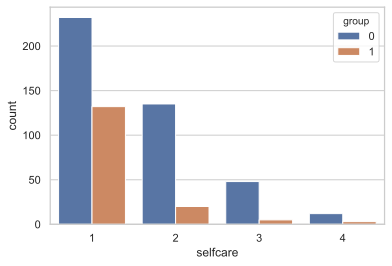

In [483]:
sns.countplot(x="selfcare", hue="group", data=data)

### 3. 相互关系

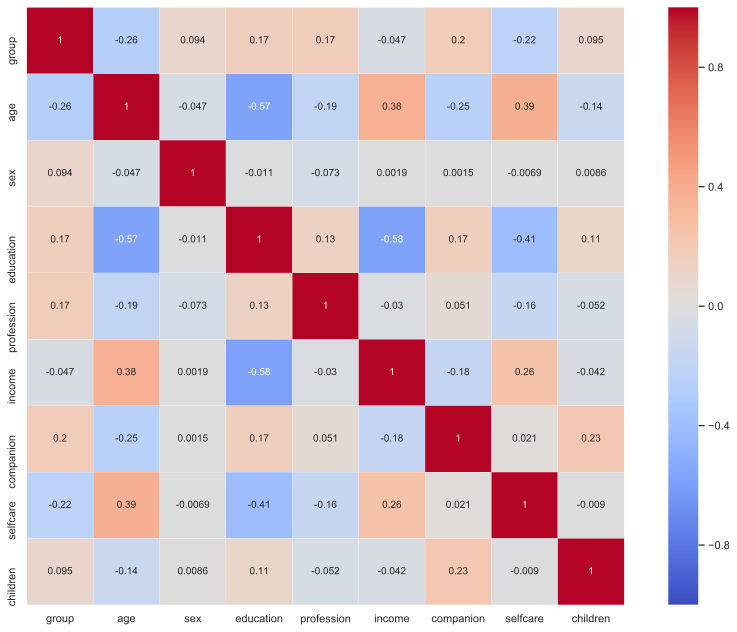

In [484]:
plt.figure(figsize=(16, 11))

sns.heatmap(data.astype(float).corr(), linewidths=0.1, square=True,
            cmap='coolwarm', linecolor='white', annot=True, vmax=1, vmin=-1);
# plt.savefig('heatmap.svg')

### 4. 机器学习

#### 4.1 模型选择

决策树（CART）是一个比较好的模型。

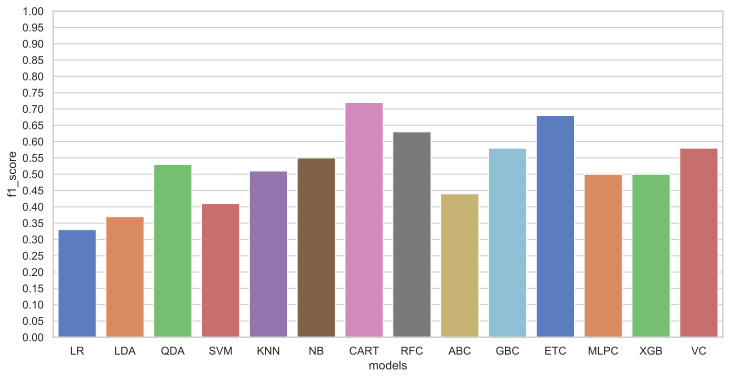

In [485]:
X, y = data.values[:,1:], data.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = {
    'LR'  : LogisticRegression(),
    'LDA' : LinearDiscriminantAnalysis(),
    'QDA' : QuadraticDiscriminantAnalysis(),
    'SVM' : SVC(),
    'KNN' : KNeighborsClassifier(),
    'NB'  : GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'RFC' : RandomForestClassifier(),
    'ABC' : AdaBoostClassifier(),
    'GBC' : GradientBoostingClassifier(),
    'ETC' : ExtraTreesClassifier(),
    'MLPC': MLPClassifier(),
    'XGB' : XGBClassifier()
}

models['VC'] = VotingClassifier(estimators=[
    ('lr', models['LR']), ('lda', models['LDA']), ('qda', models['QDA']),
    ('svm', models['SVM']),('knn', models['KNN']), ('nb', models['NB']), 
    ('cart', models['CART']), ('rfc', models['RFC']), ('abc', models['ABC']),
    ('gbc', models['GBC']), ('etc', models['ETC']), ('mlpc', models['MLPC']),
    ('xgb', models['XGB'])], voting='hard')

kfold = StratifiedKFold(n_splits=10, random_state=0)

cv_results = []

for key in models:
        cv_score = cross_val_score(models[key], X_train, y_train, scoring="f1", cv=kfold)
        cv_mean = round(cv_score.mean(), 2)
        cv_result = {'models': key, 'f1_score': cv_mean}
        cv_results.append(cv_result)

cv_results = pd.DataFrame(cv_results)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
cv_plot = sns.barplot(x='models', y='f1_score', data=cv_results, palette="muted");
cv_plot.set_yticks(np.arange(0, 1.05, 0.05));
# plt.savefig('cvscore.svg')

#### 4.2 参数调节

In [486]:
parameters = {
                'class_weight': ['balanced', 'None'],
                'max_depth': range(100),
                'max_features': range(X_train.shape[1])
}

grid_obj = GridSearchCV(models['CART'], param_grid=parameters, scoring='f1', cv=kfold)

grid_fit = grid.fit(X_train, y_train)

best_estimator = grid_fit.best_estimator_

best_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 4.3 模型评价

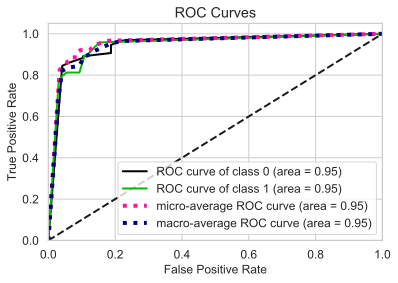

In [493]:
predicted_probas = best_estimator.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

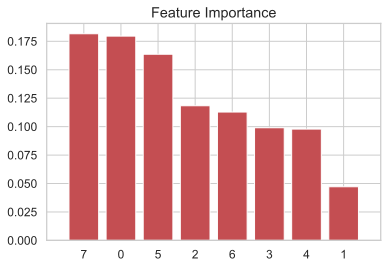

In [494]:
skplt.estimators.plot_feature_importances(best_estimator)
plt.show()

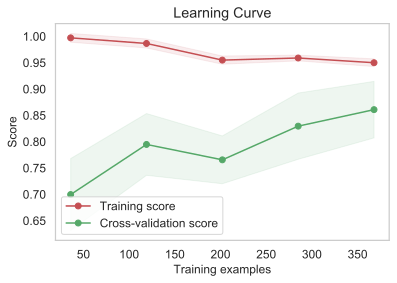

In [495]:
skplt.estimators.plot_learning_curve(best_estimator, X_train, y_train, cv=10)
plt.show()

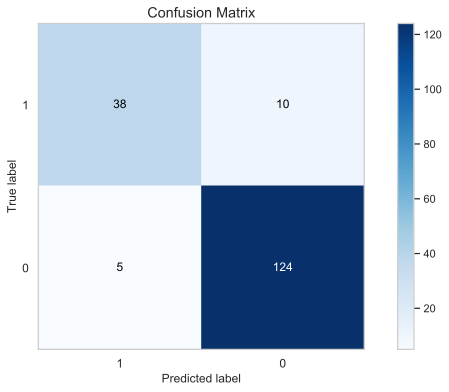

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       129
           1       0.88      0.79      0.84        48

    accuracy                           0.92       177
   macro avg       0.90      0.88      0.89       177
weighted avg       0.91      0.92      0.91       177



In [496]:
y_pred = best_estimator.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6))
plt.show()
print(classification_report(y_test, y_pred))

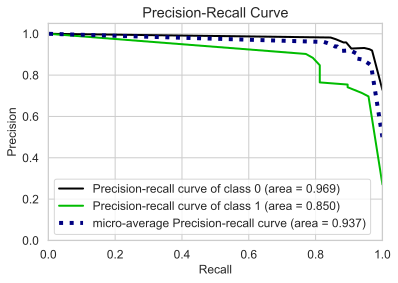

In [497]:
y_probas = best_estimator.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

## Discusstion

## References